## PENGUMPULAN DAN PEMBERSIHAN DATA

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Memuat data
data = pd.read_csv('KlasifikasiUTS (1).csv')

# Memeriksa nilai hilang
print(data.isnull().sum())

# Menangani nilai hilang dengan mengisi dengan median (bisa juga dengan metode lain)
data = data.fillna(data.median())

# Normalisasi fitur numerik (kecuali target 'Class' dan 'Amount')
scaler = StandardScaler()
features = data.drop(columns=['Class', 'Amount'])
data_scaled = scaler.fit_transform(features)

# Menambahkan kembali kolom 'Class' dan 'Amount' yang tidak perlu dinormalisasi
data_scaled = pd.DataFrame(data_scaled, columns=features.columns)
data_scaled['Class'] = data['Class']
data_scaled['Amount'] = data['Amount']

print(data_scaled.head())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64
       Time        V1        V2        V3        V4        V5        V6  \
0 -1.600923 -0.591637 -0.177212  1.048974  0.783906 -0.104102  0.285814   
1 -1.600923  0.755471  0.043873 -0.324980  0.138479  0.172548 -0.124347   
2 -1.600835 -0.590870 -1.003923  0.606537  0.091026 -0.218611  1.293329   
3 -1.600835 -0.383877 -0.250559  0.618007 -0.771674  0.123705  0.876731   
4 -1.600747 -0.485219  0.442810  0.476386  0.107165 -0.151935  0.009888   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.278481  0.054991 -0.106425  ...  0.027336  0.643908 -0.136883  0.090562   
1  0

## FEATURE ENGINEERING

In [3]:
from sklearn.preprocessing import LabelEncoder

# Melakukan Label Encoding pada target 'Class' (jika diperlukan)
label_encoder = LabelEncoder()
data_scaled['Class'] = label_encoder.fit_transform(data_scaled['Class'])

# Jika ada fitur kategorikal lainnya, bisa dilakukan One-Hot Encoding
# data_scaled = pd.get_dummies(data_scaled, columns=['fitu_kategorikal_1', 'fitur_kategorikal_2'])


## PENGEMBANGAN ARSITEKTUR MLP

### TENSERFLOW

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Membangun model MLP dengan TensorFlow
model_tf = Sequential([
    Dense(64, activation='relu', input_dim=data_scaled.shape[1]-2),  # Jumlah fitur input - 2 (untuk 'Class' dan 'Amount')
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Untuk klasifikasi biner, gunakan 'sigmoid'
])

# Menyusun model dengan optimizer dan loss function
model_tf.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Menambahkan early stopping untuk mencegah overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Melatih model
history = model_tf.fit(data_scaled.drop(columns=['Class', 'Amount']), data_scaled['Class'],
                       validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


597/597 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9390 - loss: 0.1747 - val_accuracy: 0.9992 - val_loss: 0.0050
Epoch 2/100
597/597 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9970 - loss: 0.0103 - val_accuracy: 0.9992 - val_loss: 0.0036
Epoch 3/100
597/597 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9979 - loss: 0.0072 - val_accuracy: 0.9992 - val_loss: 0.0038
Epoch 4/100
597/597 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9971 - loss: 0.0078 - val_accuracy: 0.9992 - val_loss: 0.0033
Epoch 5/100
597/597 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9972 - loss: 0.0061 - val_accuracy: 0.9990 - val_loss: 0.0033
Epoch 6/100
597/597 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9989 - loss: 0.0038 - val_accuracy: 0.9992 - val_loss: 0.0033
Epoch 7/100
597/597 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9980 - loss: 0.0051 - val_accuracy: 0.9992 - val_loss: 0.0030
Epoch 8/100
597/597 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9988 - loss: 0.0042 - val_accuracy: 0.9994

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.9996
Precision: 1.0000
Recall: 0.8824
F1 Score: 0.9375


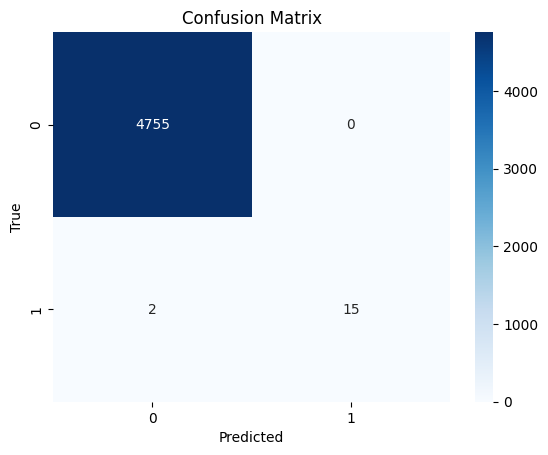

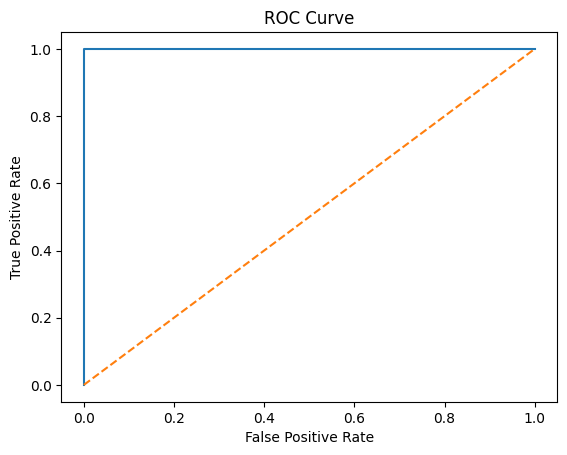

AUC: 1.0000


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

# Prediksi pada data uji
y_pred_proba = model_tf.predict(X_test)

# Mengubah prediksi probabilitas menjadi kelas biner
y_pred = (y_pred_proba > 0.5).astype(int)

# Menghitung metrik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


# Menampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba) # Use predicted probabilities for ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# AUC
auc = roc_auc_score(y_test, y_pred_proba) # Use predicted probabilities for AUC
print(f'AUC: {auc:.4f}')

### PYTORCH

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Memisahkan fitur dan target
X = data_scaled.drop(columns=['Class', 'Amount']).values
y = data_scaled['Class'].values

# Mengubah ke tensor
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Membagi data ke training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Membuat model MLP di PyTorch
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 2)  # 2 kelas untuk klasifikasi biner

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Inisialisasi model, loss, dan optimizer
model_pytorch = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_pytorch.parameters(), lr=0.001)

# Training loop
for epoch in range(100):  # Jumlah epoch
    model_pytorch.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model_pytorch(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass dan optimisasi
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')


Epoch [1/100], Loss: 0.6357
Epoch [11/100], Loss: 0.5329
Epoch [21/100], Loss: 0.4151
Epoch [31/100], Loss: 0.2681
Epoch [41/100], Loss: 0.1315
Epoch [51/100], Loss: 0.0542
Epoch [61/100], Loss: 0.0243
Epoch [71/100], Loss: 0.0151
Epoch [81/100], Loss: 0.0116
Epoch [91/100], Loss: 0.0099


150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.9990
Precision: 0.8333
Recall: 0.8824
F1 Score: 0.8571


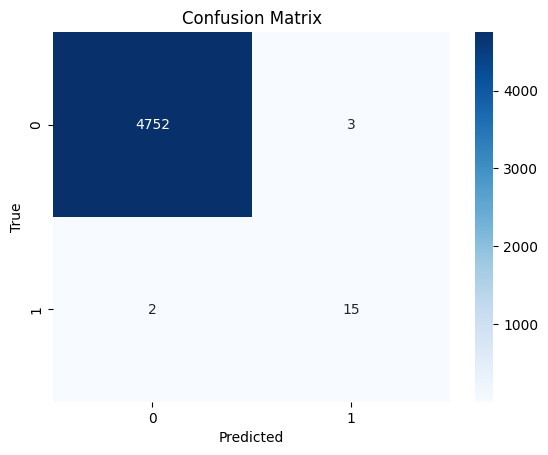

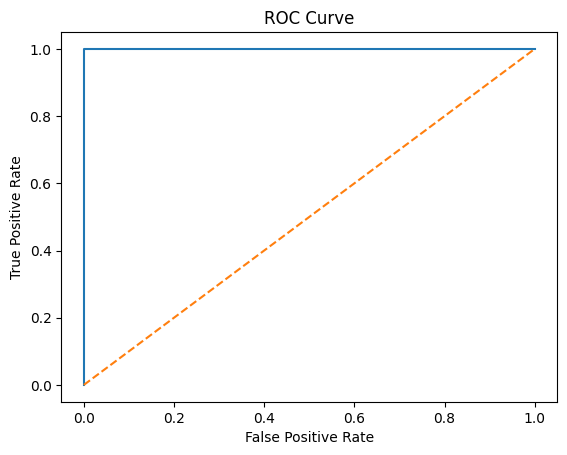

AUC: 0.9999


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

# Prediksi pada data uji
y_pred_proba = model_tf.predict(X_test)

# Mengubah prediksi probabilitas menjadi kelas biner
y_pred = (y_pred_proba > 0.5).astype(int)

# Menghitung metrik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


# Menampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba) # Use predicted probabilities for ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# AUC
auc = roc_auc_score(y_test, y_pred_proba) # Use predicted probabilities for AUC
print(f'AUC: {auc:.4f}')

## ANALISIS

### Perbandingan Model PyTorch dan TensorFlow

Untuk membandingkan kedua model (PyTorch dan TensorFlow), kita dapat melihat beberapa metrik yang ditampilkan dalam hasil seperti Akurasi, Precision, Recall, F1 Score, serta visualisasi dari Confusion Matrix dan ROC Curve.

### Penjelasan Visualisasi:

Confusion Matrix:
- PyTorch (Gambar pertama):
  - Prediksi sangat akurat pada kelas 0, dengan hanya 3 kesalahan (False Positives).
  - Namun, untuk kelas 1, ada 2 kesalahan (False Negatives) dan 15 prediksi yang benar (True Positives).

- TensorFlow (Gambar kedua):
  - Prediksi sangat baik untuk kelas 0, dengan tidak ada kesalahan (0 False Positives).
  - Kelas 1 juga memiliki sedikit kesalahan (2 False Negatives, 15 True Positives).

ROC Curve:
- Kedua model menunjukkan kurva ROC yang baik, namun TensorFlow memiliki kurva yang lebih tajam menuju titik (1,1), menunjukkan performa yang lebih kuat di hampir semua threshold. Ini berarti TensorFlow lebih unggul dalam membedakan kelas positif dan negatif pada semua tingkat probabilitas yang berbeda.

Metrik:
- Akurasi pada kedua model sangat tinggi (di atas 99%), menunjukkan bahwa kedua model ini secara umum sangat baik dalam klasifikasi.
- Precision:
  - PyTorch: 0.8333, yang berarti model ini menghasilkan 83.33% prediksi positif yang benar.
  - TensorFlow: 1.0000, yang berarti semua prediksi positif adalah benar, yang sangat bagus. Ini menunjukkan model TensorFlow sangat tepat dalam memprediksi kelas positif.
- Recall:
  - Kedua model memiliki Recall yang hampir sama (0.8824), yang menunjukkan bahwa keduanya cukup baik dalam menangkap semua kasus positif, meskipun TensorFlow sedikit lebih unggul dalam Precision.
- F1 Score:
  - PyTorch: 0.8571
  - TensorFlow: 0.9375
  - TensorFlow memiliki F1 Score yang lebih tinggi, yang berarti model ini lebih seimbang antara Precision dan Recall, memberikan performa yang lebih baik dalam hal keseimbangan.

Kesimpulan:
- TensorFlow lebih baik dalam hal Precision (100% akurat dalam prediksi positif), dan memiliki F1 Score yang lebih tinggi, menunjukkan bahwa secara keseluruhan model TensorFlow lebih baik dalam hal keseimbangan antara precision dan recall.
- PyTorch memiliki performa yang baik, tetapi sedikit lebih buruk dalam hal precision dan F1 Score dibandingkan TensorFlow.